<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Handling-Time" data-toc-modified-id="Handling-Time-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Handling Time</a></span></li><li><span><a href="#Search-Rate" data-toc-modified-id="Search-Rate-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Search Rate</a></span></li><li><span><a href="#Output-of-My-functions" data-toc-modified-id="Output-of-My-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Output of My functions</a></span></li></ul></div>

This notebook is to check the methodology to duplicate results from [Pawar et al 2012](https://www.nature.com/articles/nature11131)

In [4]:
## imports
import matplotlib.pyplot as plt
from numpy import log10, arange
import seaborn as sns
import Functions as F
## for graphs 
sns.set(context='paper',style='whitegrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

# Handling Time
Check methodology to duplicate the results from figure 2e from the SI of Pawar et al 2012

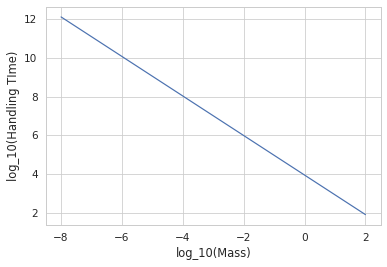

Check at log_10(m) = 0: True


In [5]:
# checking based on Pawar et al 2012 SI figure 2e
def handling_test(m):
    tk0 = 3.95 # this is log_10(tk0) in reality
    beta = 1.02 # abundant resources
    # beta = -1.02 # scarce resoruces
    logged = (-beta*np.log10(m)) + tk0
    return 10**logged # unlog data #abundant resources/

masses = arange(10**-8, 10**2, 0.1)
HandlingTime = handling_test(masses)
plt.figure()
plt.plot(log10(masses), log10(HandlingTime))
plt.xlabel("log_10(Mass)")
plt.ylabel("log_10(Handling TIme)")
plt.show()
print("Check at log_10(m) = 0: " + str(np.log10(handling_test(1)) == 3.95)) 

Handling Time Source (Pawar et al 2012 SI):

![./notebook_images/pawar2012_handling_time_fig.png](./notebook_images/pawar2012_handling_time_fig.png)

# Search Rate
Check methodology to duplicate the results from figure 3e of Pawar et al 2012

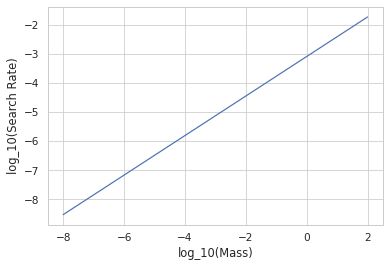

Check at log_10(m) = 0: True


In [6]:
# checking based on Pawar et al 2012 figure 3e
masses = arange(10**-8, 10**2)
def search_test(m):
    a0 = -3.08 # this is log_10(a0) in reality, for 2D scarce resources
    gamma = 0.68 # abundant resources
    # gamma = 0.68 # scarce resources
    logged = (gamma*log10(m)) + a0
    return 10**logged # unlog data #abundant resources/

searchRate = search_test(masses)
plt.figure()
plt.plot(log10(masses), log10(searchRate))
plt.xlabel("log_10(Mass)")
plt.ylabel("log_10(Search Rate)")
plt.show()
print("Check at log_10(m) = 0: " + str(np.log10(search_test(1)) == -3.08)) 

Search Rate Source (Pawar et al 2012 Main text):
![./notebook_images/pawar2012_search_rate.png](./notebook_images/pawar2012_search_rate.png)

# Output of My functions
below are the versions of my functions from [`Functions.py`](https://github.com/Don-Burns/Masters_Project/blob/master/code/Functions.py) on github as of 08/07/20

The functions are parameterised for abundant resources, i.e. scale to $m^\frac{3}{4}$

In [9]:
## fucntions
def am(m, dimensionality = "3D"):
    """
    Calculates mass specific search rate in a functional response as derived in Pawar et al 2012.

    Args:
        m (float): Mass of individual
        dimensionality (str, optional): Dimensionality of the functional response. Defaults to "3D".

    Returns:
        float: Mass specific search rate (a)
    """
    if dimensionality == "3D":
        a0 = -1.77  # this is log_10(a0) in reality
        gamma = 0.75 # abundant resources
        # gamma = 1.05 # scarce resources
        logged = (gamma*log10(m)) + a0
        return 10**logged # unlog data 

    if dimensionality == "2D":
        a0 = -3.08 # this is log_10(a0) in reality
        gamma = 0.75 # abundant resources
        # gamma = 0.68 # scarce resources
        logged = (gamma*log10(m)) + a0
        return 10**logged # unlog data 

def hm(m, dimensionality = "3D"):
    """
    Calculates mass specific handling time in a functional response as derived in Pawar et al 2012.

    Args:
        m (float): Mass of individual
        dimensionality (str, optional): Dimensionality of the functional response. Defaults to "3D".

    Returns:
        float: Mass specific handling time (h)
    """

    if dimensionality == "3D":
        tk0 = 3.04  # this is log_10(tk0) in reality
        beta = 0.75 # abundant resources
        # beta = -1.1 # scarce resoruces
        logged = (-beta*log10(m)) + tk0
        return 10**logged # unlog data 

    if dimensionality == "2D":
        tk0 = 3.95 # this is log_10(tk0) in reality
        beta = 0.75 # abundant resources
        # beta = -1.02 # scarce resoruces
        logged = (-beta*log10(m)) + tk0
        return 10**logged # unlog data 

def Xrt(t, amp, centre, period = 365):
    
    """
    To simulate the fluctuation of resource density in a functional response 
    through time according to a sine wave.

    Args:
        t (int): time passed (is converted to radians in function)
        amp (float): The amplitude of the sin wave
        centre (float): The value around which resource density fluctuates.
        period (int): Period of the wave in time. Defaults to 365


    Returns:
        float: Resource density
    """   

    x = t * (2 * pi / period) 

    return (amp * sin(x)) + centre

def Fun_Resp(m, Xr, dimensionality = "3D"):
    """
    Calculates the functional response of an organism dependent on mass.

    Args:
        m (float): Mass of individual
        Xr (float): Resource density
        dimensionality (str): Used to determine how  serach rate and handling rate are calculated. See functions for details.

    Returns:
        [float]: consumption rate of the organism
    """    
    a = am(m)  # find mass dependent search rate
    h = hm(m) # find mass dependent handling time
    
    f = (a *Xr) / (1 + a*h*Xr)
    return f

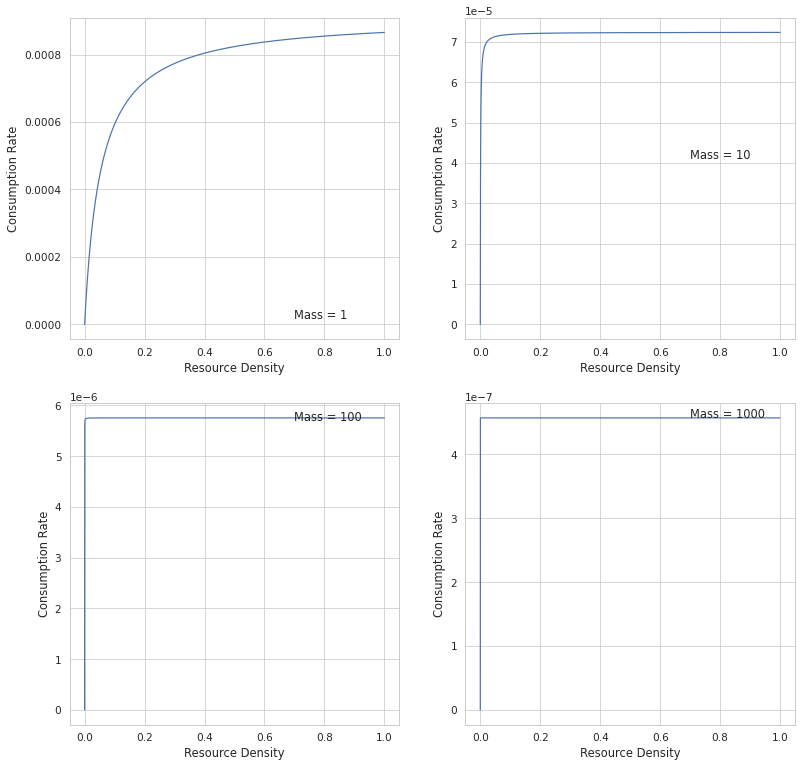

In [10]:
## parameters ##
res = 10**4 # resolution of the response
masses = [1, 10, 100, 1000]
 

plt.figure(figsize=(13,13))

for i, m in enumerate(masses, 1):
    plt.subplot(2,2, i)
    ResDens = np.linspace(0, 1, res)
    FR = Fun_Resp(m, ResDens, "3D")   
    plt.plot(ResDens, FR)
    plt.xlabel("Resource Density")
    plt.ylabel("Consumption Rate")
    pos = int(res * 0.7)
    plt.text(ResDens[pos], FR[10], "Mass = " + str(m))
#     plt.ylim(top = 0.0205)

plt.savefig("../results/FunctionalResponseCheck.pdf")
plt.show()